In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import os, sys
import glob

In [144]:
file_date = '2019-11-01-141327-2-0'

In [145]:
print(os.getcwd())
Agent_1_interaction_data_files = glob.glob('../SHARCNET/Results/multi/lazy_visitor_w_randomess/new_24actiondim/vzero/SARA/'+file_date+'/log/*.csv')
Agent_1_interaction_data_files.sort()
Agent_1_interaction_data_files

F:\unity_simulator\unity_simulator\notebook


['../SHARCNET/Results/multi/lazy_visitor_w_randomess/new_24actiondim/vzero/SARA/2019-11-01-141327-2-0/log\\2019-11-01.csv']

In [146]:
Agent_1_interaction_data = {}
for file in Agent_1_interaction_data_files:
    Agent_1_interaction_data[file] = pd.read_csv(file, header=None)
    Agent_1_interaction_data[file].columns = ['Time','Observation','Action','Reward']
    def convert_str_to_matrix(data):
        # remove '\r\n', '[', ']', then split with ' '
        temp_list = data.replace('\n', '').replace('[','').replace(']','').split(' ')
        return np.array([float(item) for item in temp_list if item != ''])
    Agent_1_interaction_data[file]['Observation'] = Agent_1_interaction_data[file]['Observation'].apply(convert_str_to_matrix)
    Agent_1_interaction_data[file]['Action'] = Agent_1_interaction_data[file]['Action'].apply(convert_str_to_matrix)
    print(Agent_1_interaction_data[file].shape)

(25000, 4)


In [147]:
Agent_1_interaction_data_all = {}
Agent_1_interaction_data_all['data'] = pd.DataFrame()
Agent_1_interaction_data_all['separate_line'] = []
Agent_1_interaction_data_all['date'] = []
for key in Agent_1_interaction_data.keys():
    Agent_1_interaction_data_all['data'] = pd.concat([Agent_1_interaction_data_all['data'], Agent_1_interaction_data[key]])
    Agent_1_interaction_data_all['separate_line'].append(len(Agent_1_interaction_data[key]))
    Agent_1_interaction_data_all['date'].append(key.split('/')[2].split('-')[0])

In [149]:

# Convert action into np.array
Agent_1_action = np.array(Agent_1_interaction_data_all['data']['Action'].tolist())
# read action_space_name
action_space_name = pd.read_csv('action_space_name_raw.csv')

Agent_1_action_df = pd.DataFrame(Agent_1_action, columns = action_space_name['actuator_name'][:24])
Agent_1_action_df.shape

(25000, 24)

In [150]:
Agent_1_action_df

actuator_name,light_node#1,light_node#2,light_node#3,light_node#4,light_node#5,light_node#6,light_node#7,light_node#8,light_node#9,light_node#10,...,light_node#15,light_node#16,light_node#17,light_node#18,light_node#19,light_node#20,light_node#21,light_node#22,light_node#23,light_node#24
0,-0.825103,0.690611,0.981024,0.051341,0.036574,0.711683,-0.014940,0.868057,0.785385,-0.230311,...,0.246557,-0.099181,0.130439,-0.538684,0.390110,-0.418479,-0.531224,-0.895327,0.619838,0.432024
1,0.194950,0.238741,-0.640642,-0.858417,0.050714,-0.756897,-0.374482,-0.255232,0.212085,-0.429794,...,-0.377398,0.917459,0.586078,0.091551,0.401943,0.687961,0.555289,-0.356761,-0.716075,0.888575
2,-0.736992,-0.712585,-0.284273,-0.324028,0.673085,-0.561240,0.521420,-0.783180,-0.601087,-0.825077,...,0.302178,0.264683,0.937872,0.575187,-0.955006,-0.294043,0.397551,0.368795,0.043468,0.444045
3,0.786363,0.084750,0.565237,0.750109,-0.768683,-0.079742,0.447079,0.868267,-0.995210,0.228439,...,-0.704566,0.722694,-0.290057,-0.549333,-0.734312,-0.695363,-0.844096,0.075757,-0.759318,-0.582041
4,0.315099,0.181593,0.375590,-0.055589,0.290329,0.529404,0.749931,-0.424495,-0.748223,-0.163536,...,0.627314,0.574303,-0.428204,-0.237448,-0.200183,-0.690700,0.207532,-0.565619,-0.114077,-0.458159
5,0.591345,-0.995078,0.648450,0.513275,-0.120868,-0.838542,0.565550,-0.097489,0.001034,-0.159944,...,0.468346,-0.369502,0.279181,-0.814338,0.687684,-0.723092,-0.012585,-0.481651,0.993014,-0.048121
6,-0.128153,0.444365,-0.311507,0.759566,-0.175797,-0.972399,0.694218,-0.312883,-0.882760,0.314895,...,-0.890663,-0.494683,0.238353,0.676775,-0.675284,-0.156388,0.731095,0.316059,-0.887577,0.743730
7,0.022170,-0.004154,-0.354094,-0.077862,0.833854,-0.964204,-0.838574,0.229479,0.575210,0.596197,...,-0.192317,-0.914882,0.352161,0.152963,0.510676,0.239643,0.268487,0.065265,0.425877,-0.497820
8,-0.866643,-0.051139,-0.354369,0.164571,0.401986,0.907548,0.807435,0.445471,0.648427,-0.467076,...,-0.724220,-0.671970,-0.893055,-0.054090,0.019597,0.882159,-0.215044,0.869071,0.595854,0.856175
9,-0.608972,0.712219,0.065294,0.740875,-0.811222,-0.706386,0.236521,0.706991,0.352828,0.765527,...,0.935800,0.363413,0.442376,-0.117465,-0.266368,-0.843806,-0.938277,0.988461,0.027773,-0.725569


## Plot action

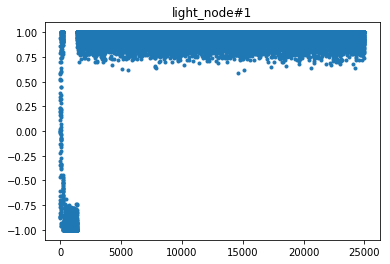

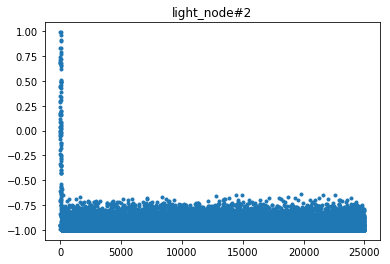

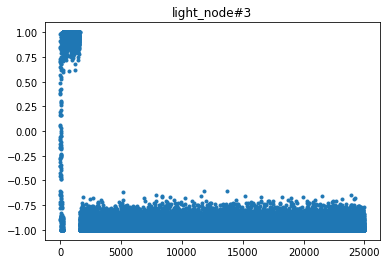

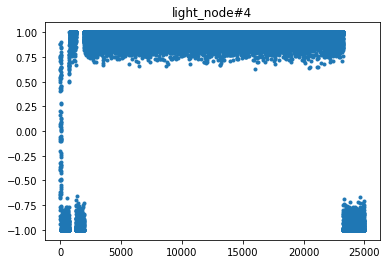

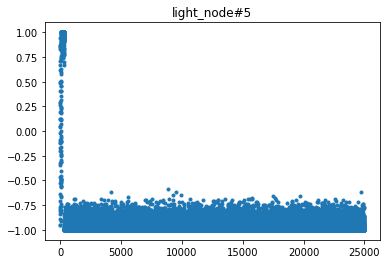

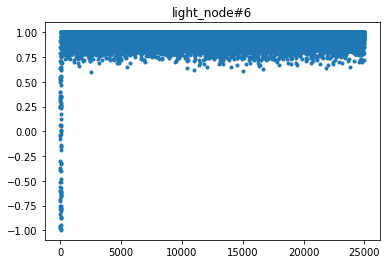

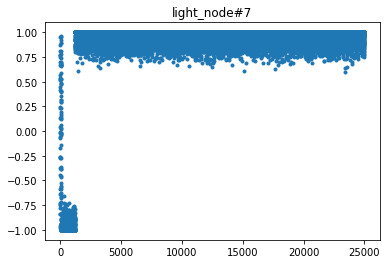

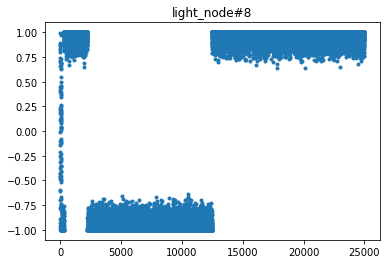

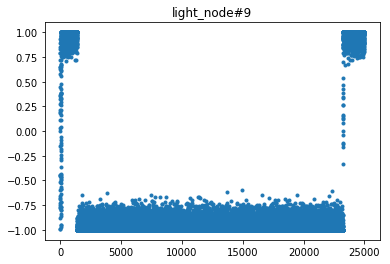

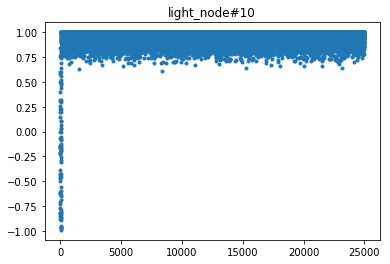

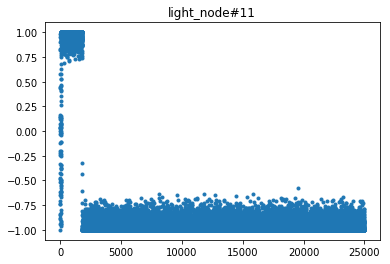

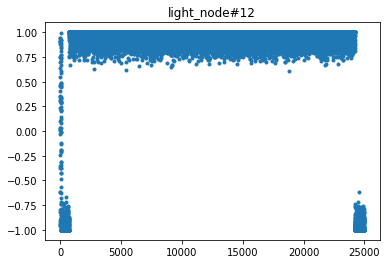

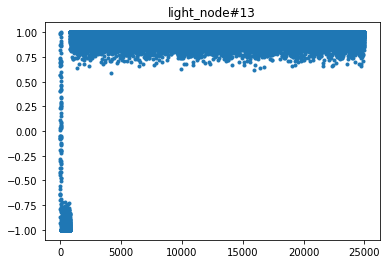

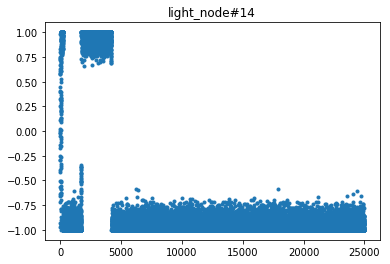

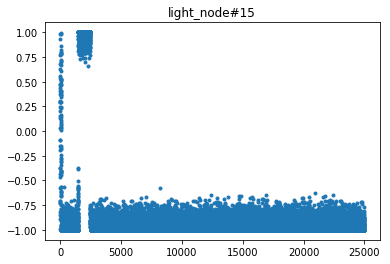

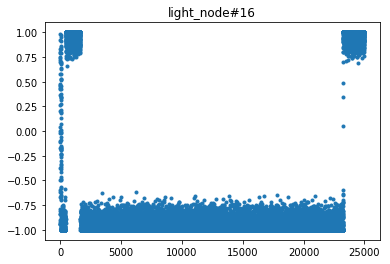

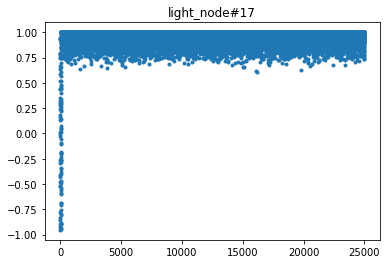

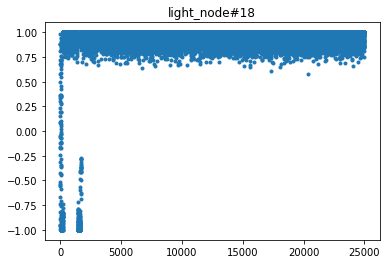

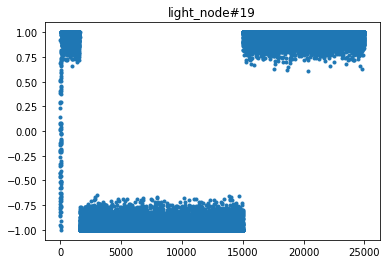

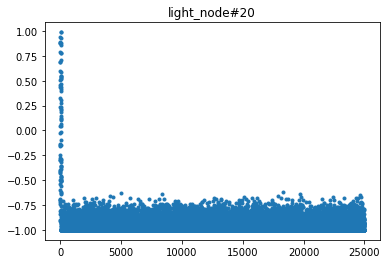

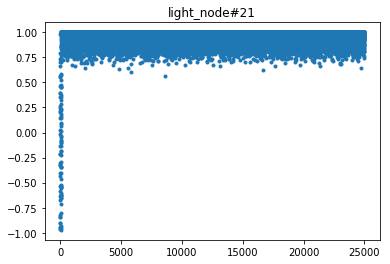

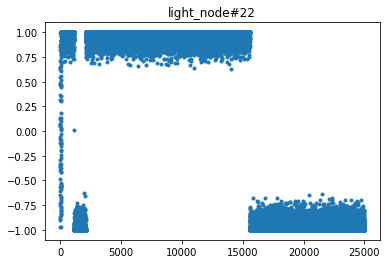

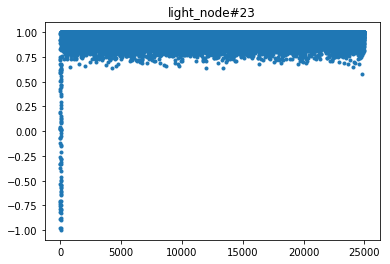

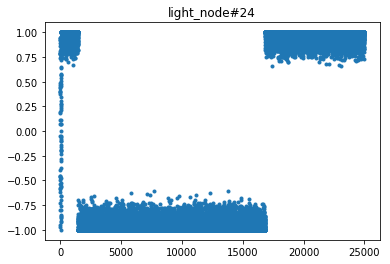

In [151]:
for i in range(24):
    plt.figure()
    col_name = 'light_node#'+str(i+1)
    plt.plot(Agent_1_action_df.index, Agent_1_action_df[col_name],'.')
    plt.title(col_name)
    

In [159]:
import matplotlib.patches as patches
import matplotlib as mpl
import matplotlib.cm as cm

def plot_action_on_scene(action,ax=None, norm = None):
    nodes_position = pd.read_csv("NodePosition.csv")
    if ax is None:
        fig = plt.figure(figsize=(12.5,7.5))
        ax = fig.add_subplot(111)    
    plt.scatter(nodes_position['x'],nodes_position['z'],c = action, cmap = "YlGnBu", s = 100, norm=norm)
    plt.grid(True)
    plt.ylim(-7.5, 7.5)
    plt.xlim(-12.5,12.5)
    plt.colorbar()
def plot_obs_on_scene(action,ax=None, norm = None):
    nodes_position = pd.read_csv("NodePosition.csv")
    if ax is None:
        fig = plt.figure(figsize=(12.5,7.5))
        ax = fig.add_subplot(111)    
    plt.scatter(nodes_position['x'],nodes_position['z'],c = action, cmap = "YlOrRd", s = 100, norm=norm)
    plt.grid(True)
    plt.ylim(-7.5, 7.5)
    plt.xlim(-12.5,12.5)
    plt.colorbar()

Average action values of last 5000 steps:[0.9599474501320001, -0.9608669828060001, -0.960621435642, 0.2875158329120001, -0.960019888994, 0.9599582890399999, 0.9599254455540002, 0.9604178418980001, -0.28153443673262807, 0.9602091607800001, -0.962077116128, 0.654319739814, 0.9605765610100001, -0.9596312893000001, -0.959546894482, -0.28622649415400003, 0.960351268554, 0.959536280078, 0.9602115268179999, -0.960517271006, 0.9612480480260001, -0.959863189708, 0.9604586182999999, 0.9596085384980001]


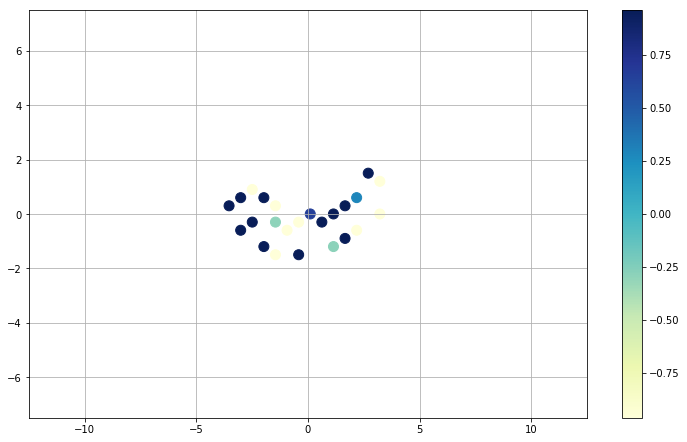

In [162]:
action_range = [-5000,None]
action = []
for i in range(24):
    col_name = 'light_node#'+str(i+1)
    action.append(np.average(Agent_1_action_df[col_name][action_range[0]:action_range[1]]))
print("Average action values of last 5000 steps:{}".format(action))

# for i, a in enumerate(action):
#     if a <= 0:
#         action[i] = 1e-3

plot_action_on_scene(action)
plt.savefig("./plots_for_thesis/visitor_position/new_24actiondim/action_history_[{},{}].png".format(action_range[0],action_range[1]))

## IR Observation

In [154]:
Agent_1_observation = np.array(Agent_1_interaction_data_all['data']['Observation'].tolist())
# read action_space_name
col = []
for i in range(24):
    col.append("IR#"+str(i+1))

Agent_1_observation_df = pd.DataFrame(Agent_1_observation, columns = col)
Agent_1_observation_df.shape


(25000, 24)

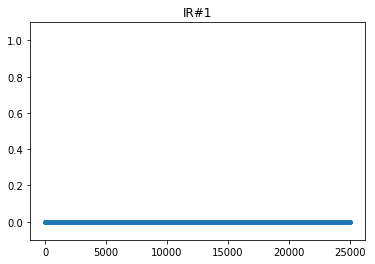

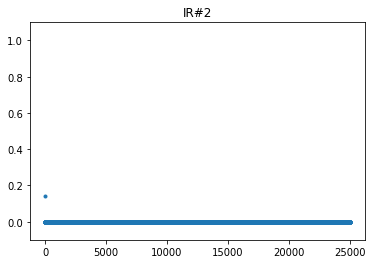

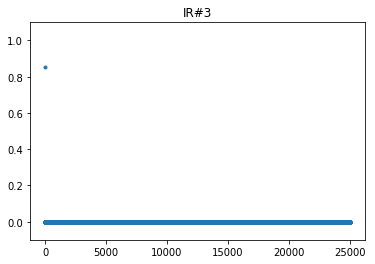

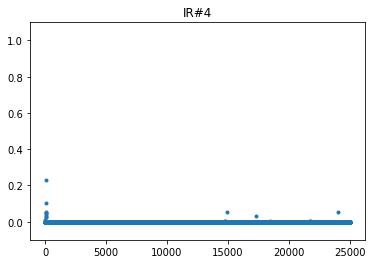

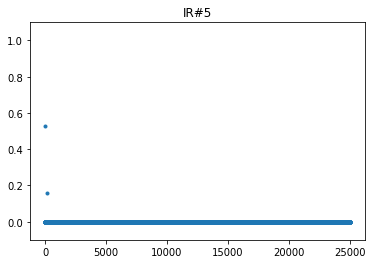

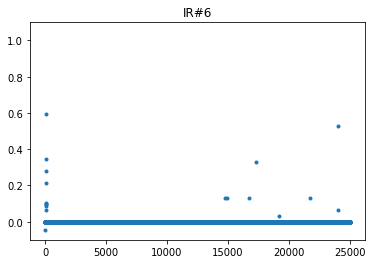

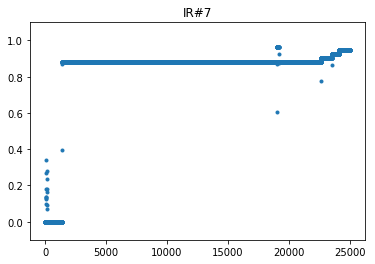

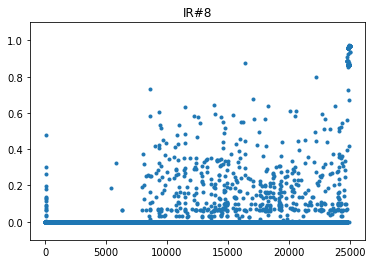

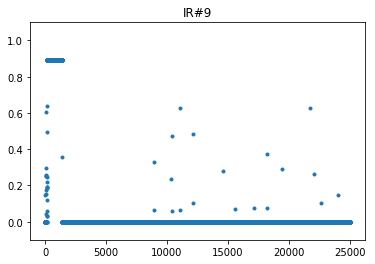

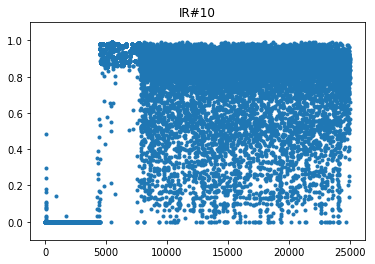

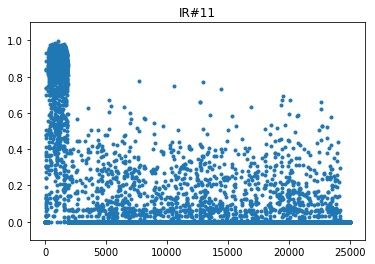

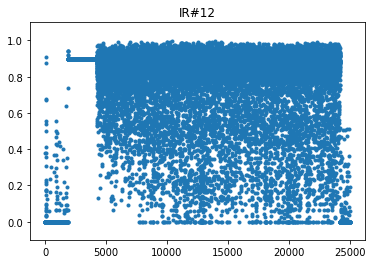

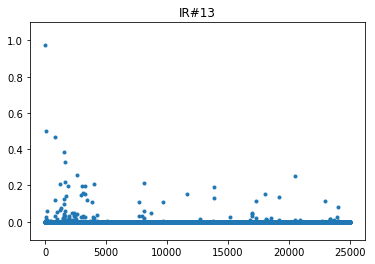

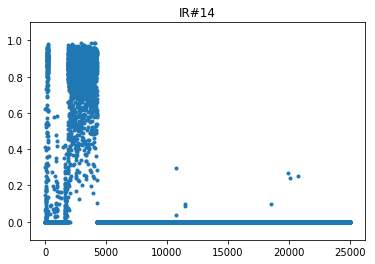

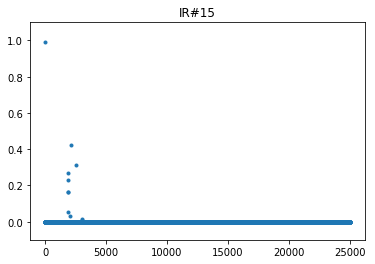

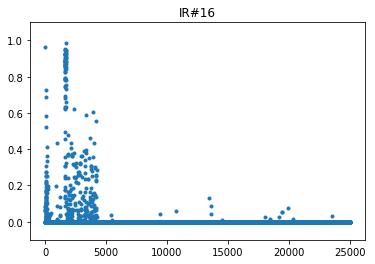

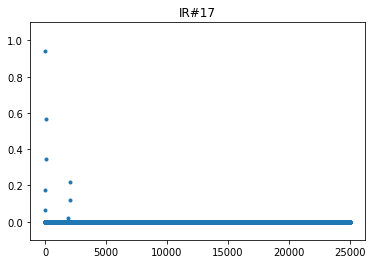

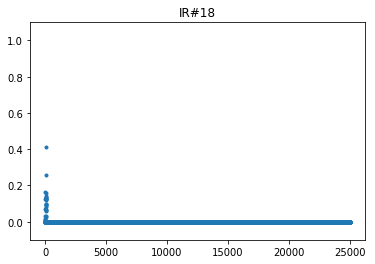

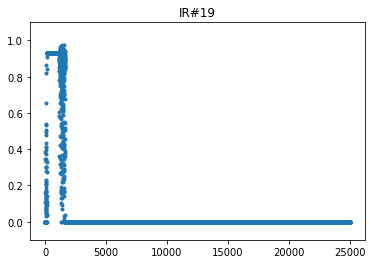

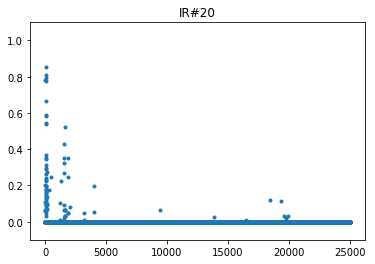

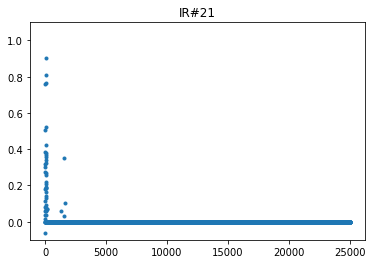

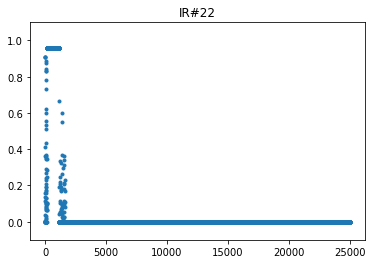

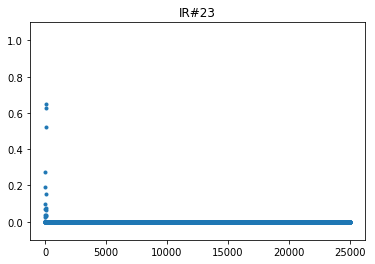

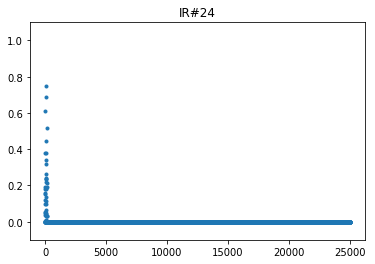

In [155]:

for i in range(24):
    plt.figure()
    col_name = 'IR#'+str(i+1)
    plt.plot(Agent_1_observation_df.index, Agent_1_observation_df[col_name],'.')
    plt.ylim((-0.1,1.1))
    plt.title(col_name)

Average IR observations:[1.00000000e-03 1.00000000e-03 1.00000000e-03 1.00000000e-03
 1.00000000e-03 1.00000000e-03 4.41135255e+03 1.19816386e+01
 3.96503450e-01 4.31150832e+03 5.50047854e+01 3.96273995e+03
 6.37400410e-01 1.00000000e-03 1.00000000e-03 8.71780500e-02
 1.00000000e-03 1.00000000e-03 1.00000000e-03 6.42730500e-02
 1.00000000e-03 1.00000000e-03 1.00000000e-03 1.00000000e-03]


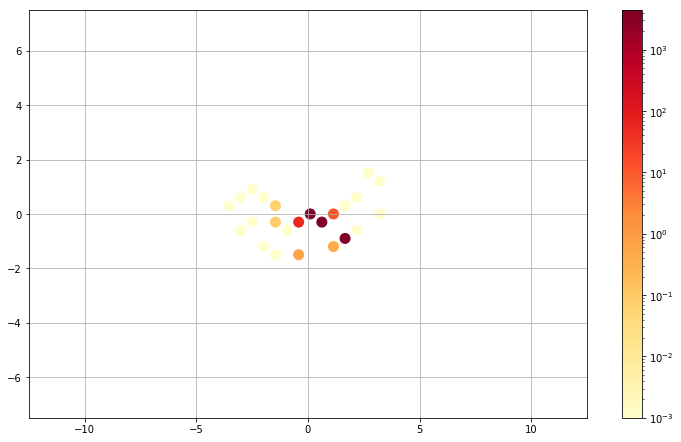

In [163]:
from matplotlib.colors import LogNorm
obs_range = [5000, 10000]
obs = []
for i in range(24):
    col_name = 'IR#'+str(i+1)
    obs.append(np.sum(Agent_1_observation_df[col_name][obs_range[0]:obs_range[1]]))
obs = np.abs(obs)
for i, o in enumerate(obs):
    if o == 0:
        obs[i] = 1e-3
print("Average IR observations:{}".format(obs))
plot_obs_on_scene(obs, norm=LogNorm())
plt.savefig("./plots_for_thesis/visitor_position/new_24actiondim/IR_history_[{},{}].png".format(obs_range[0],obs_range[1]))

## Visitor activities

In [36]:
import re
# Process log
visitor_log_file = glob.glob("../SHARCNET/Results/multi/big_collision_model/original/SARA_LED_Multi/"+file_date+"/*.out")
print(visitor_log_file)
for log_file in visitor_log_file:
    f_in = open(log_file, "r")

f_out = open("../SHARCNET/Results/multi/big_collision_model/original/SARA_LED_Multi/"+file_date+"/visitor_log.csv","w")
cnt = 0
# skip lines in the header
for _ in range(300):
    line = f_in.readline()
    if 'Loading' in line:
        cnt += 1
    if cnt >= 25:
        break;
        
# save into CSV
title = "Time,Location_x_1,Location_y_1,Location_z_1,Destination_x_1,Destination_y_1,Destination_z_1,Distance_1,"+ \
        "Location_x_2,Location_y_2,Location_z_2,Destination_x_2,Destination_y_2,Destination_z_2,Distance_2,"+ \
        "Location_x_3,Location_y_3,Location_z_3,Destination_x_3,Destination_y_3,Destination_z_3,Distance_3,"+ \
        "Location_x_4,Location_y_4,Location_z_4,Destination_x_4,Destination_y_4,Destination_z_4,Distance_4,"+ \
        "Location_x_5,Location_y_5,Location_z_5,Destination_x_5,Destination_y_5,Destination_z_5,Distance_5"+"\n"
f_out.write(title)
for line in f_in:
    if line.strip():# not empty line    
        
        x = re.search("^\d+(\.\d{1,2})", line)
        if x is not None:
            f_out.write(line.replace('(','').replace(')',''))
        
f_in.close()
f_out.close()

['../SHARCNET/Results/multi/big_collision_model/original/SARA_LED_Multi/2019-08-30-003453\\s_multi_sara_18825929ob.out']


### 1. Position

In [5]:
visitor_data = pd.read_csv("../SHARCNET/Results/multi/big_collision_model/original/SARA_LED_Multi/"+file_date+"/visitor_log.csv", sep=',')
print(visitor_data.shape)

(2450000, 36)


In [6]:
visitor_data.shape

(2450000, 36)

In [7]:
visitor_data.head()

,Time,Location_x_1,Location_y_1,Location_z_1,Destination_x_1,Destination_y_1,Destination_z_1,Distance_1,Location_x_2,Location_y_2,...,Destination_y_4,Destination_z_4,Distance_4,Location_x_5,Location_y_5,Location_z_5,Destination_x_5,Destination_y_5,Destination_z_5,Distance_5
0,0.02,0.0,0.0,0.0,-5.3,0.1,-1.4,0.0,0.0,0.0,...,0.1,0.4,0.0,-0.1,1.0,0.2,4.9,0.1,-0.2,0.0
1,0.04,-0.1,0.0,0.3,-5.3,0.1,-1.4,0.0,0.5,0.0,...,0.1,0.4,0.0,-0.7,1.2,1.2,4.9,0.1,-0.2,0.0
2,0.06,-0.1,0.0,0.9,-5.3,0.1,-1.4,0.0,0.9,0.0,...,0.1,0.4,0.0,-1.1,1.3,2.0,4.9,0.1,-0.2,0.0
3,0.08,-0.1,0.0,1.2,-5.3,0.1,-1.4,0.0,1.4,0.0,...,0.1,0.4,0.0,-1.3,1.4,2.7,4.9,0.1,-0.2,0.0
4,0.10,-0.2,0.0,1.5,-5.3,0.1,-1.4,0.0,1.9,0.0,...,0.1,0.4,0.0,-1.6,1.5,3.4,4.9,0.1,-0.2,0.0


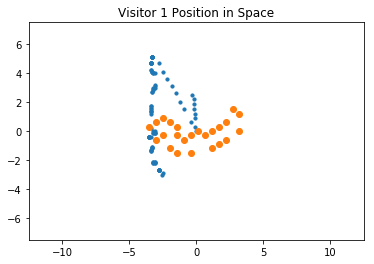

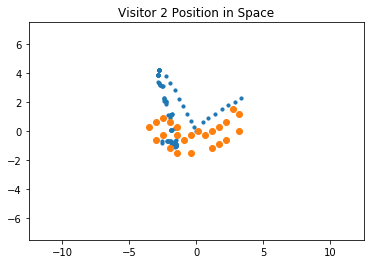

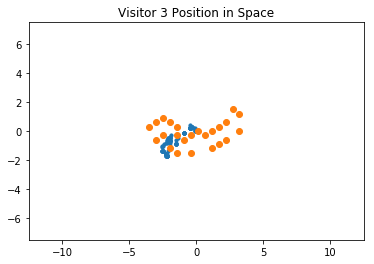

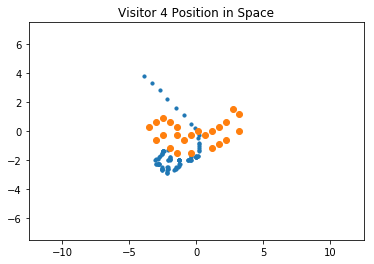

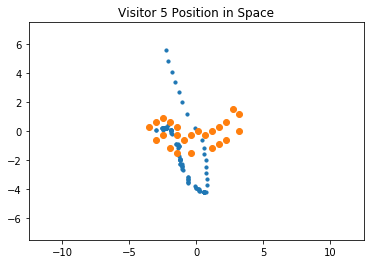

In [40]:
nodes_position = pd.read_csv("NodePosition.csv")

for i in range(1,6):
    plt.figure()
    plt.scatter(visitor_data['Location_x_' + str(i)], visitor_data['Location_z_' + str(i)], s=10)
    plt.xlim([-12.5,12.5])
    plt.ylim([-7.5,7.5])
    plt.title("Visitor "+ str(i) + " Position in Space")
    plt.scatter(nodes_position['x'], nodes_position['z'])

In [30]:
import seaborn
def heat_map(resolution, data_x, data_z):
    bins_x = np.linspace(-10,10,resolution[0]+1)
    bins_z = np.linspace(-5,5,resolution[1]+1)
    x_discretized = pd.cut(data_x,bins=bins_x,labels=np.linspace(0,resolution[0]-1,resolution[0],dtype=np.int32))
    z_discretized = pd.cut(data_z,bins=bins_z,labels=np.linspace(0,resolution[0]-1,resolution[0],dtype=np.int32))
    activity_map = np.zeros(resolution)
    for i in range(len(x_discretized)):
        position = (x_discretized[i],z_discretized[i])
        activity_map[position] += 1
    
    ax = seaborn.heatmap(activity_map, cmap="YlGnBu")
    ax.invert_yaxis()
    return activity_map


In [33]:
resolution = (10,10)

activity_map = heat_map(resolution,visitor_data['Location_x_1'],visitor_data['Location_z_1'])


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [46]:
for i in range(1,6):
    print("\nVisitor {}".format(i))
    print("z maz {}".format(np.max(visitor_data['Location_z_'+str(i)])))
    print("z min {}".format(np.min(visitor_data['Location_z_'+str(i)])))
    print("x max {}".format(np.max(visitor_data['Location_x_'+str(i)])))
    print("x min {}".format(np.min(visitor_data['Location_x_'+str(i)])))


Visitor 1
z maz 14.7
z min -3.5
x max 3.3
x min -46.4

Visitor 2
z maz 22.8
z min -3.7
x max 25.4
x min -8.6

Visitor 3
z maz 2.5
z min -2.8
x max 3.7
x min -4.4

Visitor 4
z maz 23.8
z min -3.6
x max 25.4
x min -4.9

Visitor 5
z maz 25.3
z min -2.9
x max 26.0
x min -7.8


--------------

## Debug section

In [12]:
## DEBUG ##
# subtract files near the place it breaks
import re
from collections import deque
# Process log
visitor_log_file = glob.glob("../SHARCNET/Results/SARA_LED_Multi/"+file_date+"/*.out")
print(visitor_log_file)
for log_file in visitor_log_file:
    f_in = open(log_file, "r")

f_out = open("../SHARCNET/Results/SARA_LED_Multi/"+file_date+"/visitor_log_partial.txt","w")
cnt = 0
# skip lines in the header
for _ in range(300):
    line = f_in.readline()
    if 'Loading' in line:
        cnt += 1
    if cnt >= 25:
        break;
        
# title = "Time,Location_x_1,Location_y_1,Location_z_1,Destination_x_1,Destination_y_1,Destination_z_1,Distance_1,"+ \
#         "Location_x_2,Location_y_2,Location_z_2,Destination_x_2,Destination_y_2,Destination_z_2,Distance_2,"+ \
#         "Location_x_3,Location_y_3,Location_z_3,Destination_x_3,Destination_y_3,Destination_z_3,Distance_3,"+ \
#         "Location_x_4,Location_y_4,Location_z_4,Destination_x_4,Destination_y_4,Destination_z_4,Distance_4,"+ \
#         "Location_x_5,Location_y_5,Location_z_5,Destination_x_5,Destination_y_5,Destination_z_5,Distance_5"+"\n"
# f_out.write(title)

lines_before = deque(maxlen=100)
lines_after = deque(maxlen=100)

for line in f_in:
    if line.strip():# not empty line    
        lines_before.append(line)
        x = re.search("^\d+(\.\d{1,2})", line)
        if x is not None and x[0]=='18179.68': #locate the crash event
            print("Record found")
            break
            
for line in f_in:
    if line.strip():
        lines_after.append(line)
    if len(lines_after) >= 100:
        break
for line in lines_before:
    f_out.write(line)
for line in lines_after:
    f_out.write(line)
            
        
f_in.close()
f_out.close()



['../SHARCNET/Results/SARA_LED_Multi/2019-07-30-063158\\s_multi_sara_17799892ob.out']
